In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
iris = load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [3]:
type(iris)

sklearn.utils.Bunch

In [4]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
dataframe = pd.DataFrame(
            data = iris.data,
            columns = iris.feature_names)
dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [7]:
dataframe.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [10]:
dataframe["Target"] = iris.target

In [11]:
dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [12]:
dataframe["Target"].unique()

array([0, 1, 2])

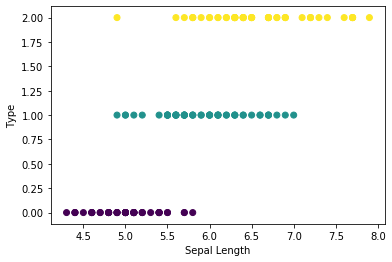

In [13]:
label = dataframe["Target"]    # Takes the targets and gets the unique values

plt.scatter(dataframe["sepal length (cm)"], dataframe["Target"], c = label)  # c plots the different labels with different colours
plt.xlabel("Sepal Length")
plt.ylabel("Type")
plt.show()

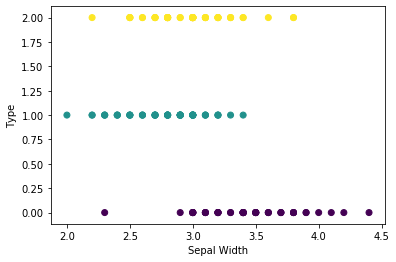

In [14]:
label = dataframe["Target"]
plt.scatter(dataframe["sepal width (cm)"], dataframe["Target"], c = label)
plt.xlabel("Sepal Width")
plt.ylabel("Type")
plt.show()

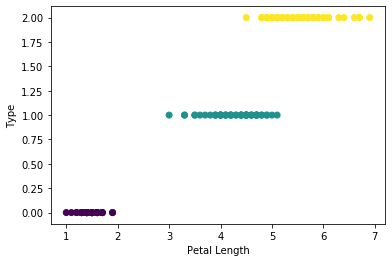

In [15]:
label = dataframe["Target"]
plt.scatter(dataframe["petal length (cm)"], dataframe["Target"], c=label)
plt.xlabel("Petal Length")
plt.ylabel("Type")
plt.show()

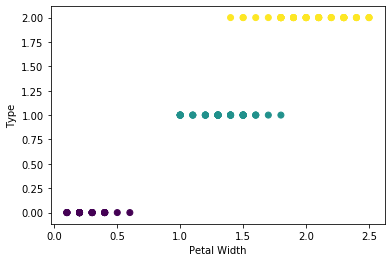

In [16]:
label = dataframe["Target"]    
plt.scatter(dataframe["petal width (cm)"], dataframe["Target"], c=label)
plt.xlabel("Petal Width")
plt.ylabel("Type")
plt.show()

In [17]:
dataframe["Target"].value_counts()

2    50
1    50
0    50
Name: Target, dtype: int64

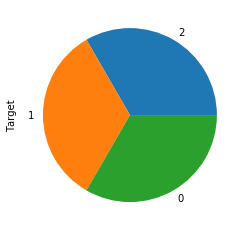

In [18]:
dataframe["Target"].value_counts().plot(kind="pie")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f44c35dc438>,
      dtype=object)

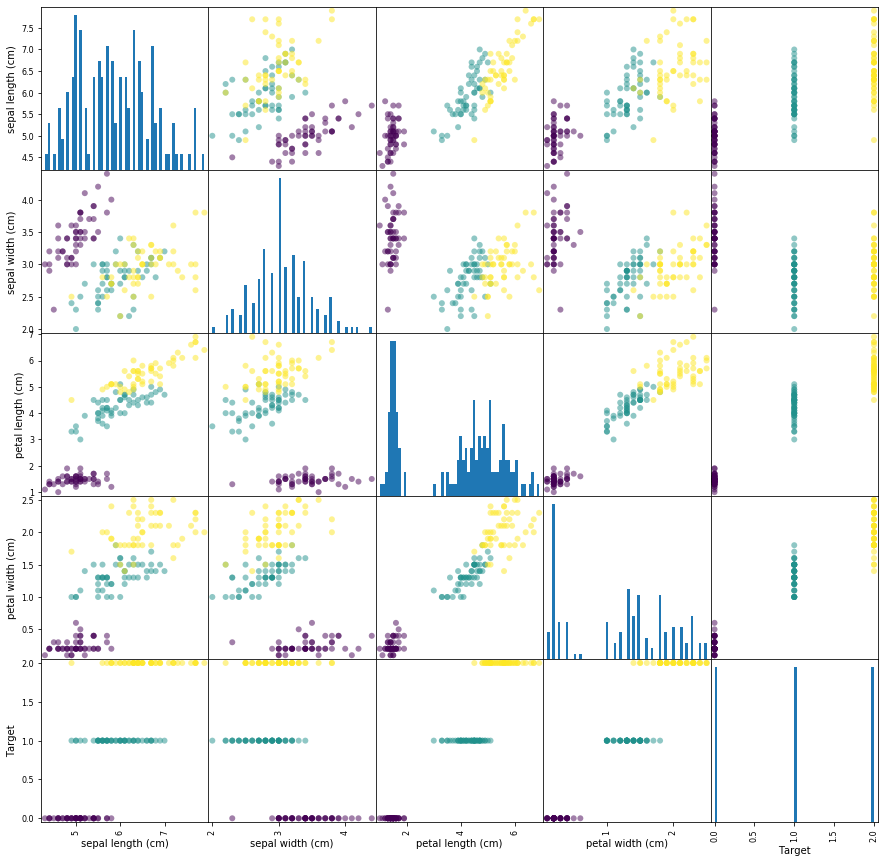

In [19]:
pd.plotting.scatter_matrix(dataframe, c=dataframe["Target"], figsize=(15, 15), marker="o", hist_kwds={"bins": 60})

In [20]:
svc = SVC(probability=True)

In [21]:
x = iris.data     # dataframe.iloc[:, 0:3]
y = iris.target   # dataframe.iloc[:, -1]

In [22]:
XTrain, XTest, YTrain, YTest = train_test_split(x, y, test_size=0.3, random_state=10)

In [23]:
svc.fit(XTrain, YTrain)

/home/aditya/miniconda3/envs/ML_Workshop/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [24]:
svc.predict(XTest)

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0,
       1])

In [25]:
YTest

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0,
       1])

In [26]:
accuracy_score(svc.predict(XTest), YTest), accuracy_score(svc.predict(XTrain), YTrain)

(1.0, 0.9809523809523809)

In [27]:
svc.predict([[5.2, 3.5, 0.5, 0.2]])

array([0])

In [28]:
svc.probability = True   # Stores the probabilities of of x being of a part of a class/target. 

In [29]:
svc.predict_proba(XTest)

array([[0.01100175, 0.95643015, 0.0325681 ],
       [0.01201132, 0.04337485, 0.94461383],
       [0.95701602, 0.0228574 , 0.02012658],
       [0.01034921, 0.91502777, 0.07462302],
       [0.95868793, 0.02160393, 0.01970814],
       [0.01609419, 0.92754073, 0.05636508],
       [0.01425052, 0.590661  , 0.39508848],
       [0.00891601, 0.98272046, 0.00836353],
       [0.95807087, 0.0226011 , 0.01932803],
       [0.00925946, 0.90295776, 0.08778279],
       [0.01099735, 0.80640414, 0.18259851],
       [0.01093705, 0.04146234, 0.94760061],
       [0.0079025 , 0.94983864, 0.04225886],
       [0.94575074, 0.02944091, 0.02480835],
       [0.96148066, 0.02016558, 0.01835376],
       [0.01227309, 0.02406431, 0.9636626 ],
       [0.0141012 , 0.87652411, 0.10937469],
       [0.93904392, 0.03170342, 0.02925266],
       [0.96042663, 0.0211587 , 0.01841467],
       [0.95743217, 0.02095356, 0.02161427],
       [0.01173991, 0.01390492, 0.97435517],
       [0.01210796, 0.0062823 , 0.98160974],
       [0.

In [30]:
svc = SVC(probability=True, kernel="poly", degree=10, gamma=200, C=0.1)

In [31]:
x = iris.data     # dataframe.iloc[:, 0:3]
y = iris.target   # dataframe.iloc[:, -1]

In [32]:
XTrain, XTest, YTrain, YTest = train_test_split(x, y, test_size=0.3, random_state=10)

In [33]:
svc.fit(XTrain, YTrain)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=10, gamma=200, kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [34]:
svc.predict(XTest)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

In [35]:
YTest

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0,
       1])

In [36]:
svc.predict([[5.2, 3.5, 0.5, 0.2]])

array([2])

In [37]:
svc.predict_proba(XTest)

array([[2.44186112e-14, 2.93023329e-14, 1.00000000e+00],
       [2.44186112e-14, 2.93023329e-14, 1.00000000e+00],
       [2.44186112e-14, 2.93023329e-14, 1.00000000e+00],
       [2.44186112e-14, 2.93023329e-14, 1.00000000e+00],
       [2.44186112e-14, 2.93023329e-14, 1.00000000e+00],
       [2.44186112e-14, 2.93023329e-14, 1.00000000e+00],
       [2.44186112e-14, 2.93023329e-14, 1.00000000e+00],
       [2.44186112e-14, 2.93023329e-14, 1.00000000e+00],
       [2.44186112e-14, 2.93023329e-14, 1.00000000e+00],
       [2.44186112e-14, 2.93023329e-14, 1.00000000e+00],
       [2.44186112e-14, 2.93023329e-14, 1.00000000e+00],
       [2.44186112e-14, 2.93023329e-14, 1.00000000e+00],
       [2.44186112e-14, 2.93023329e-14, 1.00000000e+00],
       [2.44186112e-14, 2.93023329e-14, 1.00000000e+00],
       [2.44186112e-14, 2.93023329e-14, 1.00000000e+00],
       [2.44186112e-14, 2.93023329e-14, 1.00000000e+00],
       [2.44186112e-14, 2.93023329e-14, 1.00000000e+00],
       [2.44186112e-14, 2.93023

In [38]:
accuracy_score(svc.predict(XTest), YTest), accuracy_score(svc.predict(XTrain), YTrain)


(0.3111111111111111, 0.34285714285714286)